<a href="https://colab.research.google.com/github/sudama-inc/EDA-with-Pandas-and-Numpy/blob/main/pandas_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pandas Integration with Sketch

In [4]:
# !pip install sketch

In [2]:
import pandas as pd
import sketch

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/Sven-Bo/datasets/master/supermarket_sales.csv")
df.head(2)

,Invoice ID,Branch,City,Customer_type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2021,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2021,10:29,Cash,76.40,4.761905,3.8200,9.6


## Sketch Demo

In [6]:
df.sketch.ask("What is this dataset about?")

In [7]:
df.sketch.ask("Can you give me friendly names and single sentence descriptions of each column? (format output as HTML List)")

In [8]:
df.sketch.ask("What interesting analysis could we perform?")

In [9]:
df.sketch.howto("Analyze the relationship between rating and total sale")

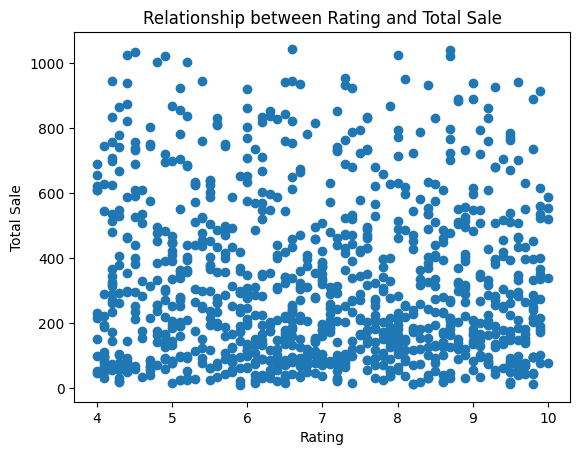

-0.03644170499701834

In [10]:
# Calculate the correlation between rating and total sale
corr = df['Rating'].corr(df['Total'])

# Plot a scatter plot to visualize the relationship between rating and total sale
import matplotlib.pyplot as plt
plt.scatter(df['Rating'], df['Total'])
plt.xlabel('Rating')
plt.ylabel('Total Sale')
plt.title('Relationship between Rating and Total Sale')
plt.show()
corr

In [11]:
df.sketch.howto("Calculate the product lines with the highest profits")

In [12]:
# Calculate the product lines with the highest profits

# Create a new column for profit
df['profit'] = df['Total'] - df['cogs']

# Group by product line and calculate the sum of profits
product_profits = df.groupby('Product line')['profit'].sum()

# Sort the values in descending order and get the top 5 product lines with highest profits
top_5_product_profits = product_profits.sort_values(ascending=False).head(5)

# Print the top 5 product lines with highest profits
print(top_5_product_profits)

Product line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Name: profit, dtype: float64


In [13]:
df.sketch.howto("Create a plot to show sales by gender")

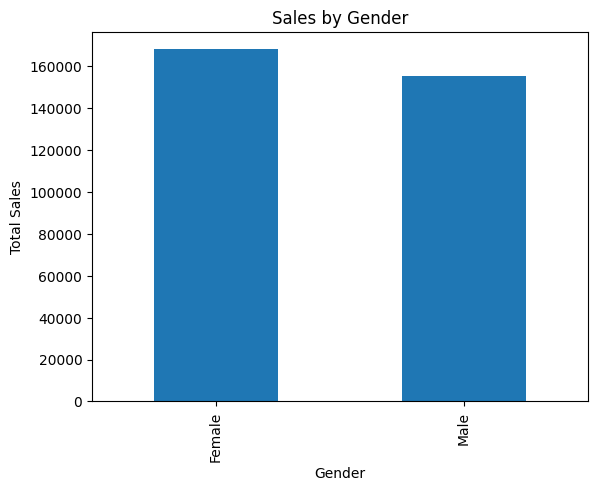

In [14]:
# import libraries
import matplotlib.pyplot as plt

# create a plot to show sales by gender
df.groupby('Gender')['Total'].sum().plot(kind='bar')
plt.title('Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()

In [15]:
df.sketch.howto("Create a plot to show sales by month")

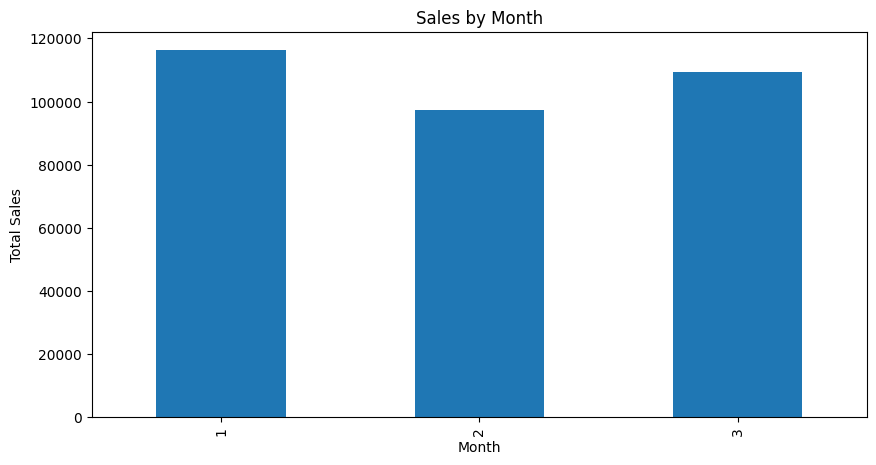

In [16]:
# Create a new column for month from the Date column
df['Month'] = pd.DatetimeIndex(df['Date']).month

# Create a plot to show sales by month
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sales_by_month = df.groupby('Month')['Total'].sum()
sales_by_month.plot(kind='bar')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [17]:

df.sketch.howto("Using Plotly, plot the total sales by each hour of the day")

In [18]:
import plotly.express as px

# Create a dataframe with the total sales by each hour of the day
df_hourly = df.groupby(df['Time'].str[:2]).agg({'Total': 'sum'}).reset_index()

# Plot the total sales by each hour of the day using Plotly
fig = px.bar(df_hourly, x='Time', y='Total', title='Total Sales by Hour of the Day')
fig.show()